# Clustering

### Part 1: Load data

In [65]:
# Load mtcars
import pandas as pd
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [66]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
model    32 non-null object
mpg      32 non-null float64
cyl      32 non-null int64
disp     32 non-null float64
hp       32 non-null int64
drat     32 non-null float64
wt       32 non-null float64
qsec     32 non-null float64
vs       32 non-null int64
am       32 non-null int64
gear     32 non-null int64
carb     32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


### Part 2: Preprocess data

In [67]:
features = mtcars.drop(['model'], axis=1)

# # Min-max scaling
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
mtcars_scaled = pd.DataFrame(min_max_scaler.fit_transform(features), columns= features.columns)
mtcars_scaled

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,0.451064,0.5,0.221751,0.204947,0.525346,0.283048,0.233333,0.0,1.0,0.5,0.428571
1,0.451064,0.5,0.221751,0.204947,0.525346,0.348249,0.300000,0.0,1.0,0.5,0.428571
2,0.527660,0.0,0.092043,0.144876,0.502304,0.206341,0.489286,1.0,1.0,0.5,0.000000
3,0.468085,0.5,0.466201,0.204947,0.147465,0.435183,0.588095,1.0,0.0,0.0,0.000000
4,0.353191,1.0,0.720629,0.434629,0.179724,0.492713,0.300000,0.0,0.0,0.0,0.142857
5,0.327660,0.5,0.383886,0.187279,0.000000,0.497827,0.680952,1.0,0.0,0.0,0.000000
6,0.165957,1.0,0.720629,0.681979,0.207373,0.525952,0.159524,0.0,0.0,0.0,0.428571
7,0.595745,0.0,0.188576,0.035336,0.428571,0.428791,0.654762,1.0,0.0,0.5,0.142857
8,0.527660,0.0,0.173859,0.151943,0.534562,0.418563,1.000000,1.0,0.0,0.5,0.142857
9,0.374468,0.5,0.240708,0.250883,0.534562,0.492713,0.452381,1.0,0.0,0.5,0.428571


### Part 3: Modeling

<b>Description:</b> Implement elbow method to specify the appropriate n_clusters amount (select the n_clusters that give the most differetiate of wcss against previous n_clusters).

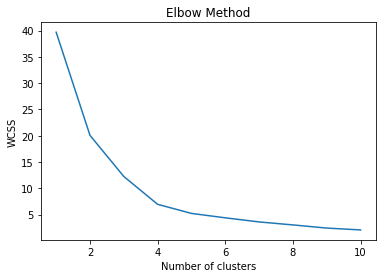

In [68]:
# impelment elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1,11):
    cls = KMeans(n_clusters=i)
    cls.fit(mtcars_scaled)
    wcss.append(cls.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [86]:
#clustering
from sklearn.cluster import KMeans
cls = KMeans(n_clusters=4)
cls.fit(mtcars_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [87]:
centroid = pd.DataFrame(cls.cluster_centers_,
                        columns=features.columns)

centroid

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,0.397872,0.583333,0.337033,0.455241,0.541475,0.343774,0.154365,0.0,1.0,0.833333,0.523810
1,0.197872,1.000000,0.714684,0.502356,0.166283,0.662512,0.314583,0.0,0.0,0.000000,0.297619
2,0.440122,0.285714,0.259452,0.177183,0.373272,0.429886,0.650850,1.0,0.0,0.285714,0.163265
3,0.764742,0.000000,0.046645,0.100959,0.639895,0.131753,0.500000,1.0,1.0,0.571429,0.061224


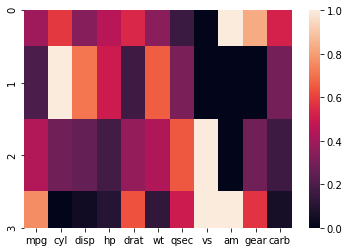

In [88]:
import seaborn as sns
sns.heatmap(centroid)

In [89]:
x = mtcars
x['cluster'] = cls.predict(mtcars_scaled)
x['cluster']

0     0
1     0
2     3
3     2
4     1
5     2
6     1
7     2
8     2
9     2
10    2
11    1
12    1
13    1
14    1
15    1
16    1
17    3
18    3
19    3
20    2
21    1
22    1
23    1
24    1
25    3
26    0
27    3
28    0
29    0
30    0
31    3
Name: cluster, dtype: int32

In [90]:
# within cluster sum of square
cls.inertia_

6.949158331220929

### Hierachical Clustering

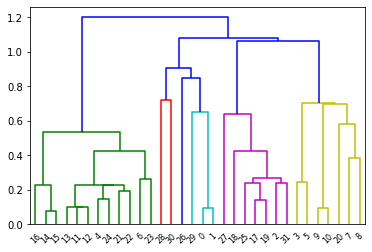

In [74]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(mtcars_scaled)
plt.figure()
dendrogram(Z)
plt.show()

In [75]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=4)
ac.fit(mtcars_scaled)
ac.labels_

array([0, 0, 3, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 1,
       1, 1, 1, 3, 0, 3, 0, 0, 0, 3])